# Andre Williams

Coding Assignment

CAP 5625 Computational Foundation of AI

Z# 234990945

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# Pre-Deliverable

1.   Import File
2.   Clean Data
3.   Create Functions

In [ ]:
# Reading input csv file
filename = 'Credit_N400_p9.csv'
data     = pd.read_csv(filename)
print(data.head())
print(data.shape)

    Income  Limit  Rating  Cards  ...  Gender  Student Married Balance
0   14.891   3606     283      2  ...    Male       No     Yes     333
1  106.025   6645     483      3  ...  Female      Yes     Yes     903
2  104.593   7075     514      4  ...    Male       No      No     580
3  148.924   9504     681      3  ...  Female       No      No     964
4   55.882   4897     357      2  ...    Male       No     Yes     331

[5 rows x 10 columns]
(400, 10)


In [ ]:
# Convert qualitative features to numbers required for regression analysis 
data_p = data.copy() # making a copy for preprocessing of input data

col_name = 'Gender'
data_p[col_name] = data[col_name].replace(['Male','Female'],[1,0])

col_name = 'Student'
data_p[col_name] = data[col_name].replace(['Yes','No'],[1,0])

col_name = 'Married'
data_p[col_name] = data[col_name].replace(['Yes','No'],[1,0])

print(data_p.head())

    Income  Limit  Rating  Cards  ...  Gender  Student  Married  Balance
0   14.891   3606     283      2  ...       1        0        1      333
1  106.025   6645     483      3  ...       0        1        1      903
2  104.593   7075     514      4  ...       1        0        0      580
3  148.924   9504     681      3  ...       0        0        0      964
4   55.882   4897     357      2  ...       1        0        1      331

[5 rows x 10 columns]


In [ ]:
# Converting pandas dataframe to numpy array for further processing and separating input features X and output variable Y 
X = np.array(data_p.iloc[:,:-1], dtype='float64') # all columns except last column which is output variable Balance
print(X.shape)
print(X[:5,:])

Y = np.array(data_p.iloc[:,-1], dtype='float64') # Selecting last column
Y = Y.reshape([-1,1])
print(Y.shape)
print(Y[:5,:])


(400, 9)
[[1.48910e+01 3.60600e+03 2.83000e+02 2.00000e+00 3.40000e+01 1.10000e+01
  1.00000e+00 0.00000e+00 1.00000e+00]
 [1.06025e+02 6.64500e+03 4.83000e+02 3.00000e+00 8.20000e+01 1.50000e+01
  0.00000e+00 1.00000e+00 1.00000e+00]
 [1.04593e+02 7.07500e+03 5.14000e+02 4.00000e+00 7.10000e+01 1.10000e+01
  1.00000e+00 0.00000e+00 0.00000e+00]
 [1.48924e+02 9.50400e+03 6.81000e+02 3.00000e+00 3.60000e+01 1.10000e+01
  0.00000e+00 0.00000e+00 0.00000e+00]
 [5.58820e+01 4.89700e+03 3.57000e+02 2.00000e+00 6.80000e+01 1.60000e+01
  1.00000e+00 0.00000e+00 1.00000e+00]]
(400, 1)
[[333.]
 [903.]
 [580.]
 [964.]
 [331.]]


In [ ]:
# Defining functions for centering response variable Y and standardizing input features X
# Both Y and X are assumed to be numpy arrays
# Dimension of Y is assumed to be (num_samples,1) and dim of X is assumed to be (num_samples, num_features)

# Function for centering Y
def center_Y(Y):
    mean_Y = np.mean(Y, axis=0)
    Y_p = Y - mean_Y
    return Y_p , mean_Y
    
# Function for standardizing X 
def standardize_X(X) :
    mean_X = np.mean(X, axis=0)
    mean_X = mean_X.reshape([1,-1]) # reshaping mean_X to dim (1,9) , useful for broadcasting in following steps
    X_p    = X - mean_X 
    std_X  = np.std(X_p, axis=0) # computing standard deviation 
    std_X  = std_X.reshape([1,-1]) # reshaping std_X to dim (1,9) , useful for broadcasting in following steps
    X_p    = X_p / std_X 
    return X_p, mean_X, std_X



In [ ]:
# Centering response variable Y and standardizing input features X
Y_p, mean_Y = center_Y(Y)
X_p, mean_X, std_X = standardize_X(X)
print('Mean_Y' , mean_Y)
print('Mean_X' , mean_X)
print('STD_X'  , std_X)


Mean_Y [520.015]
Mean_X [[4.5218885e+01 4.7356000e+03 3.5494000e+02 2.9575000e+00 5.5667500e+01
  1.3450000e+01 4.8250000e-01 1.0000000e-01 6.1250000e-01]]
STD_X [[3.52001903e+01 2.30531179e+03 1.54530616e+02 1.36955969e+00
  1.72282310e+01 3.12129781e+00 4.99693656e-01 3.00000000e-01
  4.87179382e-01]]


In [ ]:
# Function for performing batch gradient descent for Ridge Regression
# Both Y and X are assumed to be numpy arrays
# Dimension of Y is assumed to be (num_samples,1) and dim of X is assumed to be (num_samples, num_features)
# X,Y are assumed to have been pre-processed for centering Y and standardizing features X
# alpha is the specified learning rate 
# lmbda is the specified tuning parameter (the regularization factor)
# This function returns - 
# beta_coeffs - the computed ridge regression parameters (beta coefficients)
# mse_lst     - list of mean squared errors computed for each iteration of the gradient descent 
# Check for convergence by using percentage of old beta vs. new beta
def perform_RR(X, Y, alpha, lmbda) : 
    num_samples , num_features = X.shape
    max_iters = 1000
    beta_convergence = 1e-8
    mse_lst = []
    beta_coeffs = np.random.uniform(-1,1,(num_features,1)) # initializing beta_coeffs with random values from a uniform distribution in the range [-1,1]
    for i in range(max_iters) :    
        beta_coeffs_old = beta_coeffs
        temp = Y - np.matmul(X,beta_coeffs)
        beta_coeffs = beta_coeffs - 2*alpha*( lmbda*beta_coeffs -  np.matmul( X.T, temp ) )
        
        Y_pred = np.matmul(X,beta_coeffs)
        mse = np.mean(np.square(Y - Y_pred))
        mse_lst.append(mse)
        
        beta_coeffs_diff = np.abs((beta_coeffs - beta_coeffs_old)/beta_coeffs_old)
        beta_diff_max    = np.max(beta_coeffs_diff)
        if (beta_diff_max < beta_convergence):
            print("Skipping further gradient descent iterations since beta coefficients not changing. Present iteration {}".format(i))
            break
            
    if (mse_lst[-1] < mse_lst[0]) : # verifying that the last mean squared error value is lower than the initial value
        pass 
    else :
        print("Algorithm did NOT converge for alpha={}, lambda={}".format(alpha, lmbda))
    
    return beta_coeffs, mse_lst
    


# Deliverable 1
Create Plot

Computing coefficients for tuning parameter=0.01
Computing coefficients for tuning parameter=0.1
Computing coefficients for tuning parameter=1.0
Computing coefficients for tuning parameter=10.0
Computing coefficients for tuning parameter=100.0
Computing coefficients for tuning parameter=1000.0
Skipping further gradient descent iterations since beta coefficients not changing. Present iteration 737
Computing coefficients for tuning parameter=10000.0
Skipping further gradient descent iterations since beta coefficients not changing. Present iteration 86


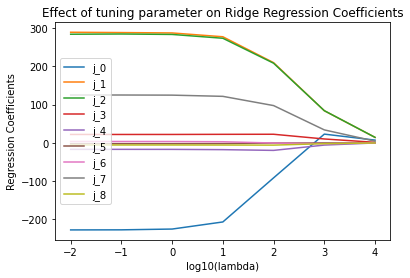

In [ ]:
lmbdas     = np.array([1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])
log_lmbdas = np.log10(lmbdas)
#print(log_lmbda)

alpha = 1e-5
beta_coeffs_lst = [] # initializing empty list for storing the computed beta_coefficients for each of the tuning parameter lmbda values     
for i, lmbda in enumerate(lmbdas) :
    print('Computing coefficients for tuning parameter={}'.format(lmbda))
    coeffs, mse_lst = perform_RR(X_p, Y_p, alpha, lmbda)
    beta_coeffs_lst.append(coeffs)

num_features = X_p.shape[1]    
plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Regression Coefficients')
plt.title('Effect of tuning parameter on Ridge Regression Coefficients')
for j in range(num_features) :
    coeffs_j    = [ coeffs[j,0] for coeffs in beta_coeffs_lst  ]
    legend_str = 'j_{}'.format(j)
    plt.plot(log_lmbdas, coeffs_j, label=legend_str)
plt.legend()
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


# Deliverable 2
*5 Fold Cross Validation*

[0, 80, 160, 240, 320]
[80, 160, 240, 320, 400]
Computing 5-fold cross validation error for tuning parameter=0.01
CV_error 12396.79724409415
Computing 5-fold cross validation error for tuning parameter=0.1
CV_error 12405.032044695472
Computing 5-fold cross validation error for tuning parameter=1.0
CV_error 12528.61842606936
Computing 5-fold cross validation error for tuning parameter=10.0
CV_error 13876.757727092288
Computing 5-fold cross validation error for tuning parameter=100.0
CV_error 31038.934509413946
Computing 5-fold cross validation error for tuning parameter=1000.0
Skipping further gradient descent iterations since beta coefficients not changing. Present iteration 677
Skipping further gradient descent iterations since beta coefficients not changing. Present iteration 704
Skipping further gradient descent iterations since beta coefficients not changing. Present iteration 678
Skipping further gradient descent iterations since beta coefficients not changing. Present iteration 6

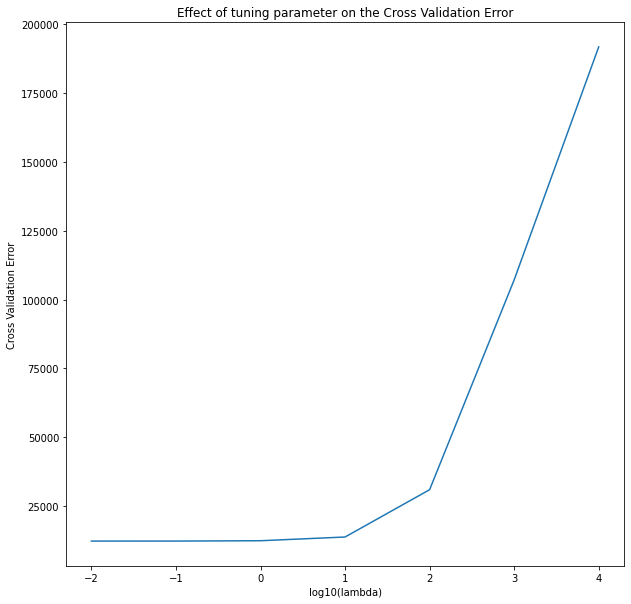

In [ ]:
lmbdas     = np.array([1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])
log_lmbdas = np.log10(lmbdas)
#print(log_lmbda)

# validation data start and end indices for 5-fold cross validation
num_samples = X.shape[0]
fold_factor = 5 
num_samples_val = num_samples//fold_factor
s_indices = [ num_samples_val*ind for ind in range(fold_factor)]
e_indices = [ ind + num_samples_val for ind in s_indices ]
print(s_indices)
print(e_indices)

alpha = 1e-5
CV_errors = [] # initializing empty list for storing the cross validation errors for each of the tuning parameter lmbda values     
for i, lmbda in enumerate(lmbdas) :
    print('Computing 5-fold cross validation error for tuning parameter={}'.format(lmbda))
    mses = [] 
    for i in range(fold_factor) :
        s_index = s_indices[i]
        e_index = e_indices[i]
        X_val   = X[s_index:e_index, :]
        Y_val   = Y[s_index:e_index, :]
        X_train = np.vstack(( X[0:s_index,:] , X[e_index:, :] ))
        Y_train = np.vstack(( Y[0:s_index,:] , Y[e_index:, :] ))
        #print(X_val.shape, Y_val.shape, X_train.shape, Y_train.shape)
        #print(X_val[0,0], Y_val[0,0], X_train[0,0], Y_train[0,0])
    
        # Preprocessing X and Y
        X_train_p, mean_X_train, std_X_train = standardize_X(X_train)
        Y_train_p, mean_Y_train = center_Y(Y_train)
        X_val_p = (X_val - mean_X_train)/std_X_train
        Y_val_p =  Y_val - mean_Y_train
    
        # Performing ridge regression and computing mse on the validation set
        beta_coeffs, _ = perform_RR(X_train_p, Y_train_p, alpha, lmbda)
        Y_pred = np.matmul(X_val_p, beta_coeffs)  
        mse    = np.mean(np.square(Y_val_p - Y_pred))
        mses.append(mse)
    
    CV_error = np.mean(mses)
    CV_errors.append(CV_error)    
    #print("MSEs",mses)
    print("CV_error", CV_error)
    

plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Cross Validation Error')
plt.title('Effect of tuning parameter on the Cross Validation Error')
plt.plot(log_lmbdas, CV_errors)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Deliverable 3
Best tuning Parameter

In [ ]:
min_CV_error = min(CV_errors)
min_index    = CV_errors.index(min_CV_error)
best_lmbda   = lmbdas[min_index]
print("Best tuning parameter lambda={}".format(best_lmbda))
print("Cross Validation error for the best lambda={}".format(min_CV_error))


Best tuning parameter lambda=0.01
Cross Validation error for the best lambda=12396.79724409415


# Deliverable 4
Re-Compute with optimal model parameters

In [ ]:
alpha = 1e-5
beta_coeffs, _ = perform_RR(X_p, Y_p, alpha, best_lmbda)
print("Best fit model parameters")
print(np.squeeze(beta_coeffs))

Best fit model parameters
[-227.36908942  288.88566041  284.20948994   22.05911708  -16.82924539
   -2.01110398    3.67723109  125.17369611   -5.47803137]


# Deliverable 5

Code is written in python

Run code in a python Jupyter Notebook or Google Collab

Install Required Libraries - specified in the import statement

# Deliverable 6 - 
Use a statistical or machine learning library to implement deliverables 1-5


In [ ]:
# importing additional required libraries 
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Deliverable 6-1
Using SKLEARN Library

Computing coefficients for tuning parameter=0.01 using Sklearn library
Computing coefficients for tuning parameter=0.1 using Sklearn library
Computing coefficients for tuning parameter=1.0 using Sklearn library
Computing coefficients for tuning parameter=10.0 using Sklearn library
Computing coefficients for tuning parameter=100.0 using Sklearn library
Computing coefficients for tuning parameter=1000.0 using Sklearn library
Computing coefficients for tuning parameter=10000.0 using Sklearn library


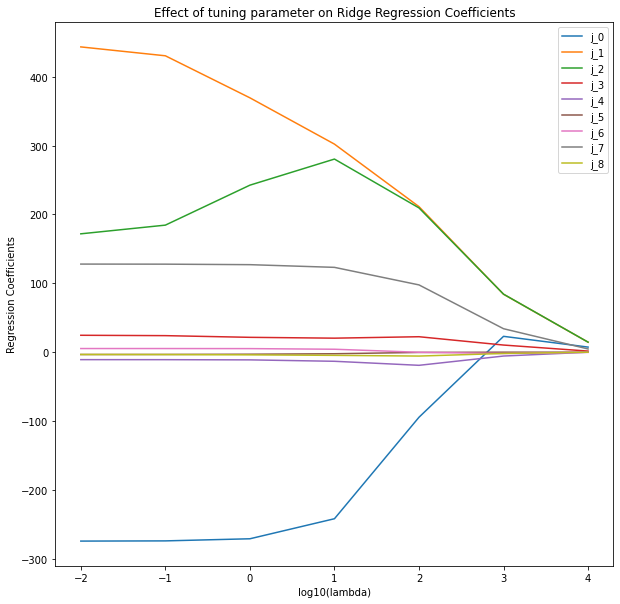

In [ ]:
lmbdas     = np.array([1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])
log_lmbdas = np.log10(lmbdas)
#print(log_lmbda)

scalar_X = StandardScaler()
X_p = scalar_X.fit_transform(X)
#print('X_mean' , scalar_X.mean_)
#print('X_std'  , scalar_X.scale_ )

scalar_Y = StandardScaler(with_std=False) # do not normalize Y, just center it
Y_p = scalar_Y.fit_transform(Y)
#print('Y_mean' , scalar_Y.mean_)

beta_coeffs_lst = [] # initializing empty list for storing the computed beta_coefficients for each of the tuning parameter lmbda values     
for i, lmbda in enumerate(lmbdas) :
    print('Computing coefficients for tuning parameter={} using Sklearn library'.format(lmbda))
    model = Ridge(alpha = lmbda, fit_intercept=False, max_iter = 1000)
    model.fit(X_p, Y_p)    
    coeffs = model.coef_
    beta_coeffs_lst.append(coeffs) 
    
num_features = X_p.shape[1]    
plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Regression Coefficients')
plt.title('Effect of tuning parameter on Ridge Regression Coefficients')
for j in range(num_features) :
    coeffs_j    = [ coeffs[0,j] for coeffs in beta_coeffs_lst  ]
    legend_str = 'j_{}'.format(j)
    plt.plot(log_lmbdas, coeffs_j, label=legend_str)
plt.legend()
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


# Deliverable 6-2
5 fold cross validation using SKLEARN

Computing 5-fold cross validation error for tuning parameter=0.01 using SKLEARN
CV_error 10090.944973234155
Computing 5-fold cross validation error for tuning parameter=0.1 using SKLEARN
CV_error 10082.46774154714
Computing 5-fold cross validation error for tuning parameter=1.0 using SKLEARN
CV_error 10083.32362788357
Computing 5-fold cross validation error for tuning parameter=10.0 using SKLEARN
CV_error 10854.65686220047
Computing 5-fold cross validation error for tuning parameter=100.0 using SKLEARN
CV_error 30276.864232586424
Computing 5-fold cross validation error for tuning parameter=1000.0 using SKLEARN
CV_error 107121.87350725205
Computing 5-fold cross validation error for tuning parameter=10000.0 using SKLEARN
CV_error 191594.575585394


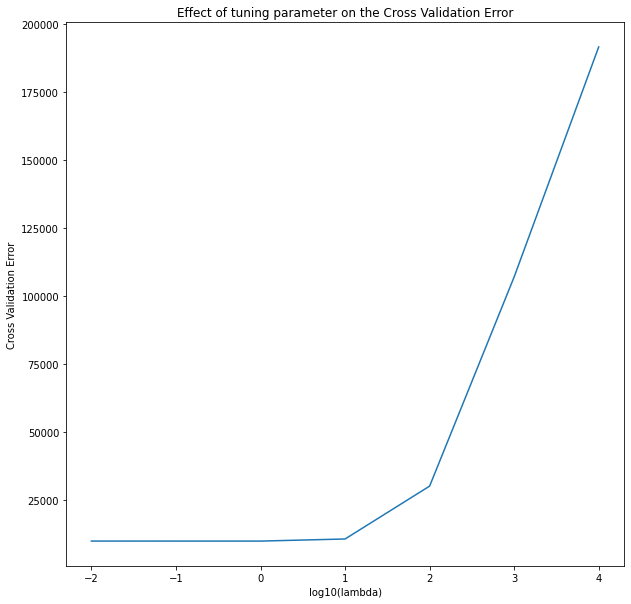

In [ ]:
lmbdas     = np.array([1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])
log_lmbdas = np.log10(lmbdas)
#print(log_lmbda)

fold_factor = 5 
kf = KFold(n_splits=fold_factor)

CV_errors = [] # initializing empty list for storing the cross validation errors for each of the tuning parameter lmbda values     
for i, lmbda in enumerate(lmbdas) :
    print('Computing 5-fold cross validation error for tuning parameter={} using SKLEARN'.format(lmbda))
    mses = [] 
    
    for train_index, val_index in kf.split(X) :
        #print("TRAIN:", train_index, "VAL:", val_index)
        X_val = X[val_index]
        Y_val = Y[val_index]
        X_train = X[train_index]
        Y_train = Y[train_index]
        
        # Preprocessing X and Y
        scalar_X  = StandardScaler()
        X_train_p = scalar_X.fit_transform(X_train)
        X_val_p   = scalar_X.transform(X_val)        
        scalar_Y  = StandardScaler(with_std=False) # do not normalize Y, just center it
        Y_train_p = scalar_Y.fit_transform(Y_train)
        Y_val_p   = scalar_Y.transform(Y_val)
    
        # Performing ridge regression and computing mse on the validation set
        model = Ridge(alpha = lmbda, fit_intercept=False, max_iter = 1000)
        model.fit(X_train_p, Y_train_p)    
        Y_pred = model.predict(X_val_p)
        mse    = mean_squared_error(Y_val_p, Y_pred) 
        mses.append(mse)
     
    CV_error = np.mean(mses)
    CV_errors.append(CV_error)    
    #print("MSEs",mses)
    print("CV_error", CV_error)
    

plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Cross Validation Error')
plt.title('Effect of tuning parameter on the Cross Validation Error')
plt.plot(log_lmbdas, CV_errors)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Deliverable 6-3
Best tuning Parameter

In [ ]:
min_CV_error = min(CV_errors)
min_index    = CV_errors.index(min_CV_error)
best_lmbda   = lmbdas[min_index]
print("Best tuning parameter lambda={}".format(best_lmbda))
print("Cross Validation error for the best lambda={}".format(min_CV_error))

Best tuning parameter lambda=0.1
Cross Validation error for the best lambda=10082.46774154714


# Deliverable 6-4
Compute best fit model parameters

In [ ]:
model = Ridge(alpha = best_lmbda, fit_intercept=False, max_iter = 1000)
model.fit(X_p, Y_p)    
beta_coeffs = model.coef_
print("Best fit model parameters")
print(np.squeeze(beta_coeffs))

Best fit model parameters
[-274.30439375  430.60643833  184.52205981   23.94169587  -10.97597645
   -3.40063905    5.18996712  127.81260569   -3.52295036]
